In [1]:
import numpy as np
import pandas as pd
import random

請從給定的網址讀取本次測驗的資料集：https://github.com/TA-aiacademy/course_3.0/releases/download/Python/housing.csv

In [2]:
df = pd.read_csv('https://github.com/TA-aiacademy/course_3.0/releases/download/Python/housing.csv')

首先，先查看整份資料集相關資訊。  
hint：info

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19743 entries, 0 to 19742
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           19405 non-null  float64
 1   latitude            19382 non-null  float64
 2   housing_median_age  19743 non-null  float64
 3   total_rooms         19743 non-null  float64
 4   total_bedrooms      19743 non-null  float64
 5   population          19743 non-null  float64
 6   households          19743 non-null  float64
 7   median_income       19743 non-null  float64
 8   median_house_value  19743 non-null  float64
 9   ocean_proximity     19575 non-null  object 
 10  level               19743 non-null  object 
dtypes: float64(9), object(2)
memory usage: 1.7+ MB


從上面可以看出，longitude、latitude 和 ocean_proximity 具有缺值。  
接下來，試著印出資料集的前 8 筆資料。

In [4]:
df.head(8)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,level
0,-118.38,33.80,36.0,4421.0,702.0,1433.0,624.0,8.0838,500001.0,NEAR OCEAN,H
1,-122.27,37.43,33.0,1601.0,223.0,629.0,215.0,15.0001,500001.0,NEAR OCEAN,H
2,-118.41,33.75,4.0,311.0,51.0,128.0,46.0,9.8091,500001.0,NEAR OCEAN,H
3,-118.33,33.77,33.0,4244.0,595.0,1534.0,557.0,9.8214,500001.0,NEAR OCEAN,H
4,-118.32,33.75,33.0,2996.0,398.0,1048.0,387.0,9.2670,500001.0,NEAR OCEAN,H
5,-118.32,33.75,37.0,1080.0,135.0,366.0,142.0,11.6677,500001.0,NEAR OCEAN,H
6,-118.32,33.74,24.0,6097.0,794.0,2248.0,806.0,10.1357,500001.0,NEAR OCEAN,H
7,-118.32,33.77,37.0,627.0,95.0,259.0,106.0,6.8870,500001.0,<1H OCEAN,H


再來，試著檢查資料集的大小 (形狀)，了解資料及共有幾筆資料和幾個欄位。

In [5]:
df.shape

(19743, 11)

觀察了資料後，第一步，我們要先處理缺失值。  
首先先找出含有 na 的全部資料。

In [6]:
df[df.isna().any(axis=1)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,level
64,-121.98,NaN,19.0,755.0,93.0,267.0,99.0,15.0000,500001.0,<1H OCEAN,H
84,-118.49,NaN,31.0,4066.0,951.0,1532.0,868.0,4.8125,500001.0,<1H OCEAN,H
90,NaN,37.79,52.0,1817.0,535.0,800.0,487.0,3.9750,500001.0,NEAR BAY,H
99,NaN,37.44,35.0,1140.0,193.0,486.0,199.0,4.6908,500001.0,NEAR OCEAN,H
114,NaN,37.50,46.0,30.0,4.0,13.0,5.0,15.0001,500001.0,NEAR BAY,H
...,...,...,...,...,...,...,...,...,...,...,...
19625,-119.77,NaN,39.0,1287.0,332.0,1386.0,306.0,1.5227,46900.0,INLAND,L
19640,-119.20,NaN,32.0,1355.0,363.0,1427.0,384.0,1.3444,45600.0,INLAND,L
19649,-114.63,NaN,15.0,1448.0,378.0,949.0,300.0,0.8585,45000.0,INLAND,L
19670,-119.00,NaN,40.0,850.0,227.0,764.0,186.0,0.9407,43600.0,INLAND,L


從上面可以知道，所有有缺失值的資料筆數總共是 860 筆。  
我們也可以只取某一欄位含有缺失值的資料出來觀察，接下來，請試著取出 ocean_proximity 為缺失值的資料，並存到另一變數當中。

In [7]:
na_df = df[df.ocean_proximity.isna()]
na_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,level
162,-118.21,34.20,35.0,3646.0,552.0,1409.0,534.0,6.3794,500001.0,NaN,H
165,-118.18,34.17,43.0,4269.0,591.0,1467.0,582.0,9.0702,500001.0,NaN,H
166,-122.00,37.23,36.0,3191.0,430.0,1234.0,440.0,9.0704,500001.0,NaN,H
237,-118.40,33.89,36.0,2127.0,314.0,807.0,306.0,8.1596,500001.0,NaN,H
278,-117.87,33.59,44.0,2499.0,396.0,910.0,374.0,6.6544,500001.0,NaN,H
...,...,...,...,...,...,...,...,...,...,...,...
17148,-118.25,34.01,28.0,481.0,136.0,596.0,128.0,1.2396,90300.0,NaN,L
17160,-118.24,33.95,37.0,441.0,125.0,390.0,98.0,1.6513,90200.0,NaN,L
18214,-117.71,33.61,26.0,3046.0,726.0,888.0,663.0,2.6848,74100.0,NaN,L
18491,-118.29,34.06,42.0,3894.0,2293.0,6846.0,2156.0,1.5553,70000.0,NaN,L


觀察完有缺失值的資料後，我們要開始對缺失值進行處理。  
首先，ocean_proximity 為類別型資料，請試著列出該欄位所有類別和類別的個數。

In [8]:
df.ocean_proximity.value_counts()

<1H OCEAN     8579
INLAND        6261
NEAR OCEAN    2533
NEAR BAY      2197
ISLAND           5
Name: ocean_proximity, dtype: int64

請試著用個數最多的類別填補 ocean_proximity 的缺失值

In [9]:
df['ocean_proximity'].fillna(value='<1H OCEAN', inplace=True)

剩下含有缺失值的 longitude、latitude 和 total_bedrooms 為數值型資料。  
接著，請清除所有具缺失值的資料。

In [10]:
df = df.dropna()
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,level
0,-118.38,33.80,36.0,4421.0,702.0,1433.0,624.0,8.0838,500001.0,NEAR OCEAN,H
1,-122.27,37.43,33.0,1601.0,223.0,629.0,215.0,15.0001,500001.0,NEAR OCEAN,H
2,-118.41,33.75,4.0,311.0,51.0,128.0,46.0,9.8091,500001.0,NEAR OCEAN,H
3,-118.33,33.77,33.0,4244.0,595.0,1534.0,557.0,9.8214,500001.0,NEAR OCEAN,H
4,-118.32,33.75,33.0,2996.0,398.0,1048.0,387.0,9.2670,500001.0,NEAR OCEAN,H
...,...,...,...,...,...,...,...,...,...,...,...
19737,-117.16,32.71,52.0,845.0,451.0,1230.0,375.0,1.0918,22500.0,NEAR OCEAN,L
19738,-118.33,34.15,39.0,493.0,168.0,259.0,138.0,2.3667,17500.0,<1H OCEAN,L
19739,-123.17,40.31,36.0,98.0,28.0,18.0,8.0,0.5360,14999.0,INLAND,L
19740,-117.02,36.40,19.0,619.0,239.0,490.0,164.0,2.1000,14999.0,INLAND,L


最後，再顯示一次所有資料的相關資資訊，確定是否還有缺失值。

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19044 entries, 0 to 19741
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           19044 non-null  float64
 1   latitude            19044 non-null  float64
 2   housing_median_age  19044 non-null  float64
 3   total_rooms         19044 non-null  float64
 4   total_bedrooms      19044 non-null  float64
 5   population          19044 non-null  float64
 6   households          19044 non-null  float64
 7   median_income       19044 non-null  float64
 8   median_house_value  19044 non-null  float64
 9   ocean_proximity     19044 non-null  object 
 10  level               19044 non-null  object 
dtypes: float64(9), object(2)
memory usage: 1.7+ MB


使用 describe 顯示各個欄位的統計量

In [12]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,19044.000000,19044.000000,19044.000000,19044.000000,19044.000000,19044.000000,19044.000000,19044.000000,19044.000000
mean,-119.567912,35.628830,28.619145,2640.316110,538.885896,1427.430582,500.336746,3.870969,207054.636106
std,2.000390,2.133736,12.576401,2184.806006,422.643879,1138.903177,383.448011,1.895007,115475.650978
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1451.000000,296.000000,786.750000,280.000000,2.564300,119800.000000
50%,-118.490000,34.250000,29.000000,2126.500000,435.000000,1167.000000,410.000000,3.534100,180000.000000
75%,-118.010000,37.710000,37.000000,3150.000000,648.000000,1726.000000,606.000000,4.738600,264900.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


請依照 median_house_value 由大至小排序。

In [13]:
df = df.sort_values(by=['median_house_value'], ascending=False)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,level
0,-118.38,33.80,36.0,4421.0,702.0,1433.0,624.0,8.0838,500001.0,NEAR OCEAN,H
624,-118.48,34.05,36.0,2143.0,434.0,751.0,396.0,6.7496,500001.0,<1H OCEAN,H
613,-122.14,37.45,52.0,3841.0,537.0,1391.0,540.0,7.8647,500001.0,NEAR BAY,H
614,-122.15,37.46,52.0,1803.0,257.0,683.0,259.0,10.9508,500001.0,NEAR BAY,H
615,-122.15,37.46,39.0,906.0,109.0,353.0,112.0,10.3942,500001.0,NEAR BAY,H
...,...,...,...,...,...,...,...,...,...,...,...
19737,-117.16,32.71,52.0,845.0,451.0,1230.0,375.0,1.0918,22500.0,NEAR OCEAN,L
19738,-118.33,34.15,39.0,493.0,168.0,259.0,138.0,2.3667,17500.0,<1H OCEAN,L
19739,-123.17,40.31,36.0,98.0,28.0,18.0,8.0,0.5360,14999.0,INLAND,L
19740,-117.02,36.40,19.0,619.0,239.0,490.0,164.0,2.1000,14999.0,INLAND,L


請畫出 median_house_value 的直方圖 (hist)、機率密度統計圖 (kde)、盒型圖 (box)

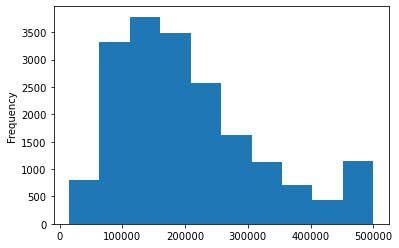

In [14]:
df.median_house_value.plot.hist()

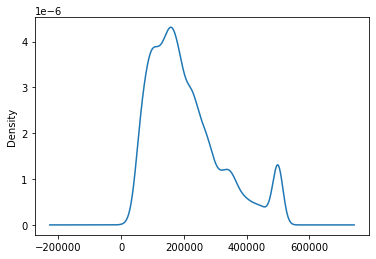

In [15]:
df.median_house_value.plot.kde()

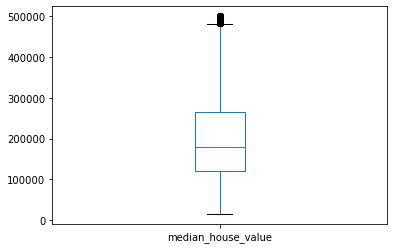

In [16]:
df.median_house_value.plot.box()

請依照 median_house_value 的高低，  
將低於(含) 25 百分位的分為 'L'；  
25 百分位至 75 百分位的分為 'M'；  
高於 (含) 75 百分位的分為 'H'，並存至 'level' 欄位中

In [17]:
def value_level(row):
    if row['median_house_value'] <= df.median_house_value.quantile(.25):
        return 'L'
    elif row['median_house_value'] >= df.median_house_value.quantile(.75):
        return 'H'
    return 'M'

df['level'] = df.apply(value_level, axis=1)

請顯示 ocean_proximity 和 level 的統計量

In [18]:
df.describe(include='O')

,ocean_proximity,level
count,19044,19044
unique,5,3
top,<1H OCEAN,M
freq,8452,9515


請使用 pivot_table ，設定 level 的各個類別為列、ocean_proximity 的各個類別為欄，  
並且計算每個組別下 median_house_value 的平均。

In [19]:
df.pivot_table(values='median_house_value', index='level', columns='ocean_proximity', aggfunc = 'mean')

ocean_proximity,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
level,,,,,
H,370457.166792,350386.717472,380440.0,381572.051078,377976.590387
L,100190.648567,82888.727556,NaN,94795.473251,93442.121212
M,191283.848998,163309.594595,NaN,190795.656566,188655.060034


上述發現， ISLAND 類別中有 NaN ，請列出所有 ocean_proximity 為 ISLAND 的資料觀察原因。

In [20]:
df[df.ocean_proximity=='ISLAND']

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,level
1212,-118.32,33.34,52.0,996.0,264.0,341.0,160.0,2.7361,450000.0,ISLAND,H
1211,-118.32,33.35,27.0,1675.0,521.0,744.0,331.0,2.1579,450000.0,ISLAND,H
1535,-118.33,33.34,52.0,2359.0,591.0,1100.0,431.0,2.8333,414700.0,ISLAND,H
3677,-118.32,33.33,52.0,2127.0,512.0,733.0,288.0,3.3906,300000.0,ISLAND,H
4034,-118.48,33.43,29.0,716.0,214.0,422.0,173.0,2.6042,287500.0,ISLAND,H


請使用 groupby ，算出 level 欄位各個類別的 median_house_value 平均值

In [21]:
df.groupby(by='level')['median_house_value'].mean()

level
H    372901.363503
L     86632.619467
M    184384.077772
Name: median_house_value, dtype: float64

最後，請使用 left join 的方式，將  level 欄位各個類別的 median_house_value 平均值併入到資料集當中。

In [22]:
tmp = pd.DataFrame(df.groupby(by='level')['median_house_value'].mean()).rename(columns={'median_house_value':'mean'})
df = pd.merge(df, tmp, on='level', how='left')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,level,mean
0,-118.38,33.80,36.0,4421.0,702.0,1433.0,624.0,8.0838,500001.0,NEAR OCEAN,H,372901.363503
1,-118.48,34.05,36.0,2143.0,434.0,751.0,396.0,6.7496,500001.0,<1H OCEAN,H,372901.363503
2,-122.14,37.45,52.0,3841.0,537.0,1391.0,540.0,7.8647,500001.0,NEAR BAY,H,372901.363503
3,-122.15,37.46,52.0,1803.0,257.0,683.0,259.0,10.9508,500001.0,NEAR BAY,H,372901.363503
4,-122.15,37.46,39.0,906.0,109.0,353.0,112.0,10.3942,500001.0,NEAR BAY,H,372901.363503
...,...,...,...,...,...,...,...,...,...,...,...,...
19039,-117.16,32.71,52.0,845.0,451.0,1230.0,375.0,1.0918,22500.0,NEAR OCEAN,L,86632.619467
19040,-118.33,34.15,39.0,493.0,168.0,259.0,138.0,2.3667,17500.0,<1H OCEAN,L,86632.619467
19041,-123.17,40.31,36.0,98.0,28.0,18.0,8.0,0.5360,14999.0,INLAND,L,86632.619467
19042,-117.02,36.40,19.0,619.0,239.0,490.0,164.0,2.1000,14999.0,INLAND,L,86632.619467
